In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('6_DA - Test - Email Campaign Process - All Email Data.csv')

In [3]:
df.head()

,Company Name,Name,Tittle,Website,Company Linkedin,Linkedin URL,Campaign Name,Email Status
0,50Fin,Darpan Tanna,Co-Founder,https://www.50fin.in/,https://www.linkedin.com/company/50fin,https://www.linkedin.com/in/darpantanna,NaN,Campaign Started from smart lead
1,8club,Madhur Rao,Co-Founder and CTO,https://www.8club.co/,https://www.linkedin.com/company/eight.club,https://www.linkedin.com/in/madhur-rao,NaN,Campaign Started from smart lead
2,8club,Kaushal Chanani,Co-Founder,https://www.8club.co/,https://www.linkedin.com/company/eight.club,https://www.linkedin.com/in/kaushal-chanani,NaN,Campaign Started from smart lead
3,8club,Kunal Yadav,Co-Founder & CEO,https://www.8club.co/,https://www.linkedin.com/company/eight.club,https://www.linkedin.com/in/kunalyadav08,NaN,Campaign Started from smart lead
4,AADYAH,Sunderarajan Varadan,CEO,https://www.aadyah.com/,https://www.linkedin.com/company/aadyah-aerosp...,https://www.linkedin.com/in/sunderarajan-varad...,NaN,Not in List


In [4]:
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

### Data Cleaning

In [6]:
# Standardizing column names
df.rename(columns={'Tittle': 'Title'}, inplace=True)

In [7]:
# Checking column names to identify any unexpected spaces or formatting issues
df.columns

Index(['Company Name', 'Name', 'Title', 'Website', 'Company Linkedin ',
       'Linkedin URL', 'Campaign Name', 'Email Status'],
      dtype='object')

In [8]:
# Stripping extra spaces from column names
df.columns = df.columns.str.strip()

# Now, retrying the cleaning process
df['Company Linkedin'].fillna("Unknown", inplace=True)
df['Linkedin URL'].fillna("Unknown", inplace=True)
df['Campaign Name'].fillna("No Campaign", inplace=True)
df['Email Status'].fillna("No Status", inplace=True)

# Verifying cleaning steps
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9893 entries, 0 to 9892
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company Name      9893 non-null   object
 1   Name              9893 non-null   object
 2   Title             9893 non-null   object
 3   Website           3686 non-null   object
 4   Company Linkedin  9893 non-null   object
 5   Linkedin URL      9893 non-null   object
 6   Campaign Name     9893 non-null   object
 7   Email Status      9893 non-null   object
dtypes: object(8)
memory usage: 618.4+ KB


(None,
   Company Name                  Name               Title  \
 0        50Fin          Darpan Tanna          Co-Founder   
 1        8club            Madhur Rao  Co-Founder and CTO   
 2        8club       Kaushal Chanani          Co-Founder   
 3        8club           Kunal Yadav    Co-Founder & CEO   
 4       AADYAH  Sunderarajan Varadan                 CEO   
 
                    Website                                   Company Linkedin  \
 0    https://www.50fin.in/             https://www.linkedin.com/company/50fin   
 1    https://www.8club.co/        https://www.linkedin.com/company/eight.club   
 2    https://www.8club.co/        https://www.linkedin.com/company/eight.club   
 3    https://www.8club.co/        https://www.linkedin.com/company/eight.club   
 4  https://www.aadyah.com/  https://www.linkedin.com/company/aadyah-aerosp...   
 
                                         Linkedin URL Campaign Name  \
 0            https://www.linkedin.com/in/darpantanna   No C

In [9]:
df.columns

Index(['Company Name', 'Name', 'Title', 'Website', 'Company Linkedin',
       'Linkedin URL', 'Campaign Name', 'Email Status'],
      dtype='object')

### Data Cleaning Summary

In [11]:
# Data Handling: Extracting insights and formatting

# Extracting domain from Website URLs for company analysis
# Ensuring all values are treated as strings before splitting
df['Website Domain'] = df['Website'].astype(str).apply(lambda x: x.split("//")[-1].split("/")[0] if x != "Unknown" else "Unknown")

# Checking the top website domains
df['Website Domain'].value_counts().head(10)


# Standardizing Email Status values (removing inconsistencies)
df['Email Status'] = df['Email Status'].str.strip().str.lower()

# Checking unique values in Email Status
df['Email Status'].value_counts()


Email Status
no status                           6118
not in list                         3324
campaign started from smart lead     451
Name: count, dtype: int64

### Data Handling

In [13]:
# Analyzing campaign engagement by counting occurrences of each Campaign Name
campaign_analysis = df['Campaign Name'].value_counts().reset_index()
campaign_analysis.columns = ['Campaign Name', 'Count']

# Checking top 10 campaigns
campaign_analysis.head(10)


,Campaign Name,Count
0,Employee Size 11 - 100 (Founded Year 2020 - 20...,6045
1,No Campaign,3848


### Data Visualization

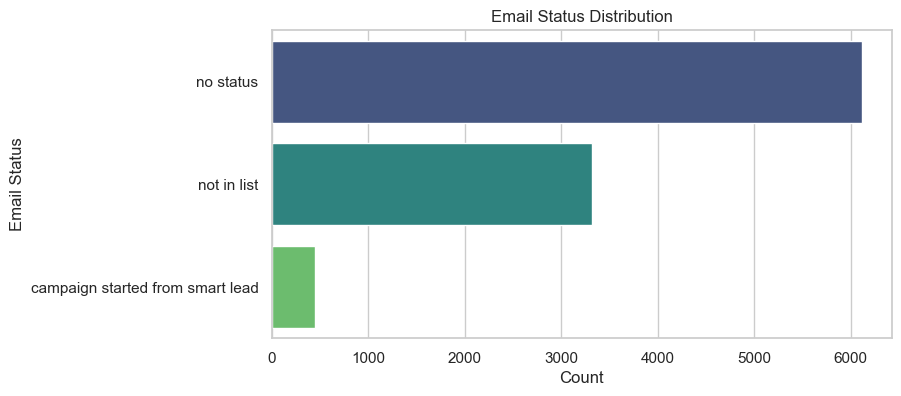

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting style
sns.set_theme(style="whitegrid")

# Plot: Distribution of Email Status
plt.figure(figsize=(8, 4))
sns.countplot(data=df, y="Email Status", order=df["Email Status"].value_counts().index, palette="viridis")
plt.xlabel("Count")
plt.ylabel("Email Status")
plt.title("Email Status Distribution")
plt.show()


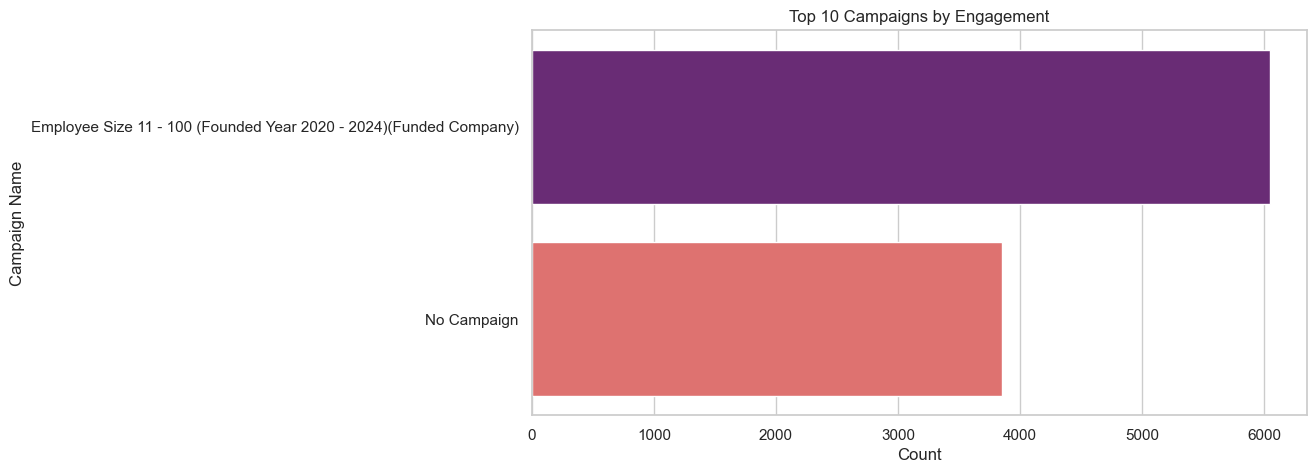

In [16]:
# Plot: Top 10 Campaigns by Count
top_campaigns = campaign_analysis.head(10)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_campaigns, y="Campaign Name", x="Count", palette="magma")
plt.xlabel("Count")
plt.ylabel("Campaign Name")
plt.title("Top 10 Campaigns by Engagement")
plt.show()

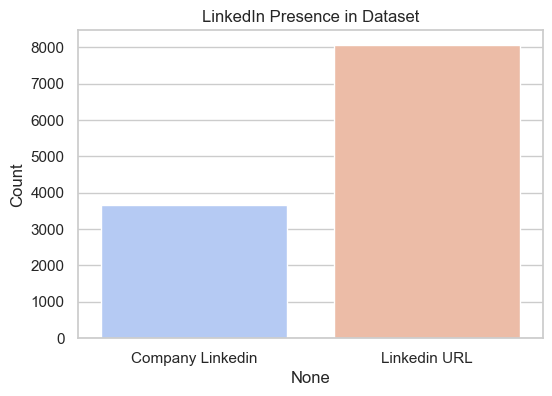

In [17]:
# Counting how many entries have valid LinkedIn URLs
linkedin_presence = df[['Company Linkedin', 'Linkedin URL']].applymap(lambda x: x != "Unknown").sum()

# Plot: LinkedIn Presence Analysis
plt.figure(figsize=(6, 4))
sns.barplot(x=linkedin_presence.index, y=linkedin_presence.values, palette="coolwarm")
plt.ylabel("Count")
plt.title("LinkedIn Presence in Dataset")
plt.show()